# Animated plot testing

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as anim
from matplotlib import image as mimage
import os
import glob

<IPython.core.display.Javascript object>


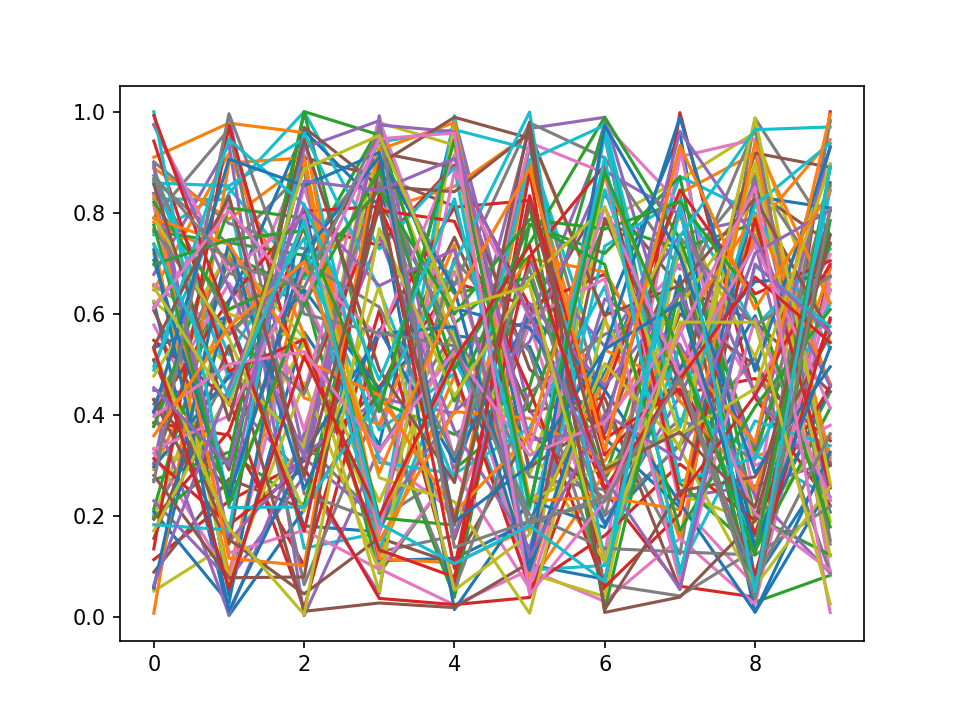

In [20]:
if not os.path.exists("animImgs"):
    os.mkdir("animImgs")
    print("Made directory ./animImgs/")
# Make some images
imgs = []
for i in range(10):
    data = np.random.random((10, 10))
    img = plt.plot(data);
    filename = "animImgs/img" + str(i) + ".png"
    plt.savefig(filename)
    if imgs == []:
        imgs = [[img]]
    else:
        imgs.append([img])

<IPython.core.display.Javascript object>


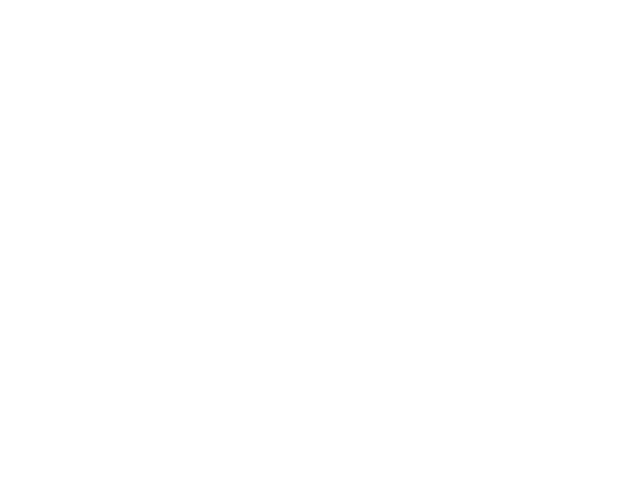

IndexError: list index out of range

In [2]:
fig = plt.figure()
files = glob.glob("animImgs/innse*.png")
files.sort()
img = plt.imshow(mimage.imread(files[0]))
imgs = [[img]]
for file in files[1:]:
    img = plt.imshow(mimage.imread(file))
    imgs.append([img])
my_anim = anim.ArtistAnimation(fig, imgs, interval=300)
plt.axis('off')
plt.show()

In [30]:
my_anim.save('rmsCutPrototype.gif', writer='imagemagick', fps=3)

MovieWriter imagemagick unavailable; using Pillow instead.


In [7]:
from parsers.RCparsers import parseRC

In [8]:
files = glob.glob("data/*.json")

In [85]:
n = 1

In [71]:
len(xGrad), len(windowMeans)

(111, 112)

In [110]:
def getGradient(vector, step):
    grad = [None] * step
    for p1, p2 in zip(vector[:-2*step], vector[step*2:]):
        grad.append((p2 - p1) / (2 * step))
    grad.extend([None] * step)
    return grad

Parsing file: data/62c87ee1e684f9000a113f60.json
Addresses [10, 9, 8, 7, 6, 5]
19


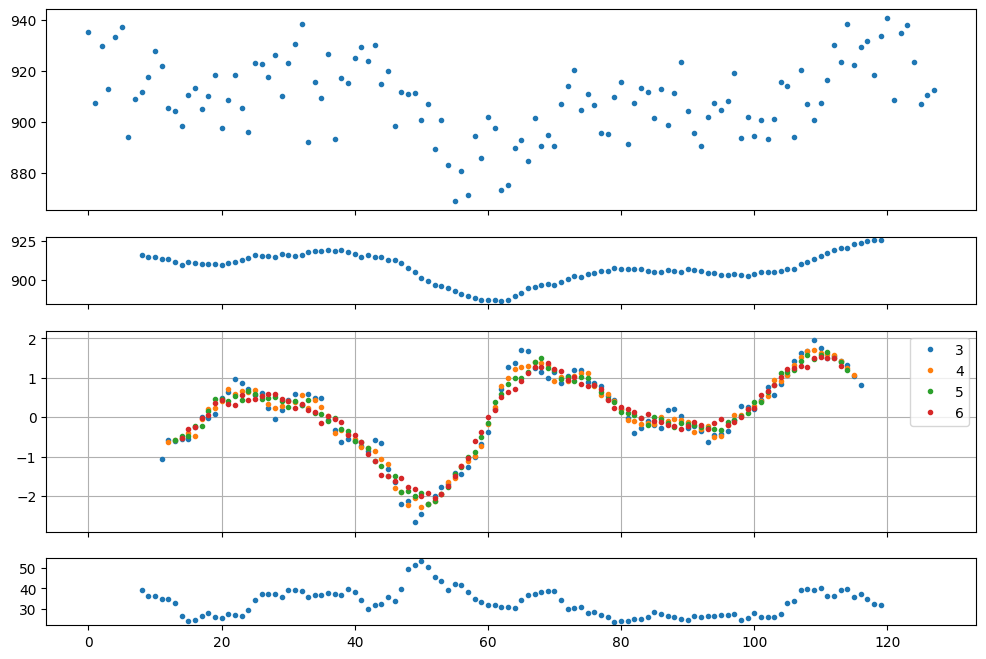

In [137]:
hybrid = parseRC(files[n])
print(n)
n += 1
stream = 0
chip = hybrid.chips[0]
innses = [channel.innse for channel in chip.getStream(stream)]
windowMeans = []
windowStds = []
xMeans = []
for i in range(8, 120):
    channels = chip.getStream(stream)[i-8:i+8]
    windowMeans.append(sum([channel.innse for channel in channels])/len(channels))
    windowStds.append(3 * np.std([channel.innse for channel in channels]))
    xMeans.append(i)

fig, axs = plt.subplots(4,1, sharex=True, gridspec_kw={'height_ratios': [3,1,3,1]}, figsize=(12, 8))

axs[0].plot(innses, '.')
#axs[0].set_ylim(800, 1200)

axs[1].plot(xMeans, windowMeans, '.')

for step in range(3,7):
    grad = getGradient(windowMeans, step)
    axs[2].plot(xMeans, grad, '.', label=step)
axs[2].grid()
axs[2].legend()

axs[3].plot(xMeans, windowStds, '.')

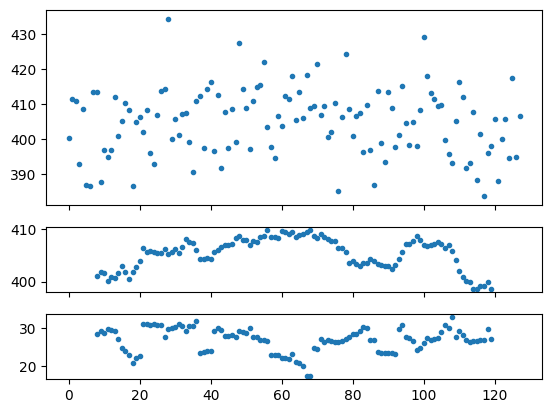

In [15]:
fig, axs = plt.subplots(3,1, sharex=True, gridspec_kw={'height_ratios': [3,1,1]})

axs[0].plot(innses, '.')
#axs[0].set_ylim(800, 1200)

axs[1].plot(xMeans, windowMeans, '.')

axs[2].plot(xMeans, windowStds, '.')

In [5]:
a = [1, 1]
for entry in a:
    entry -= 1
    print(entry)
print(a)

0
0
[1, 1]


# Some skewedness stuff

In [6]:
max([1*True, 2*True])

2

In [5]:
h = 2
a = h + True
print(a)

3


In [1]:
import glob
from parsers.RCparsers import *
from plots.ResponseCurvePlots import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = glob.glob("../data/**/*RC*txt", recursive=True)

In [3]:
n = 0

Showing file 2


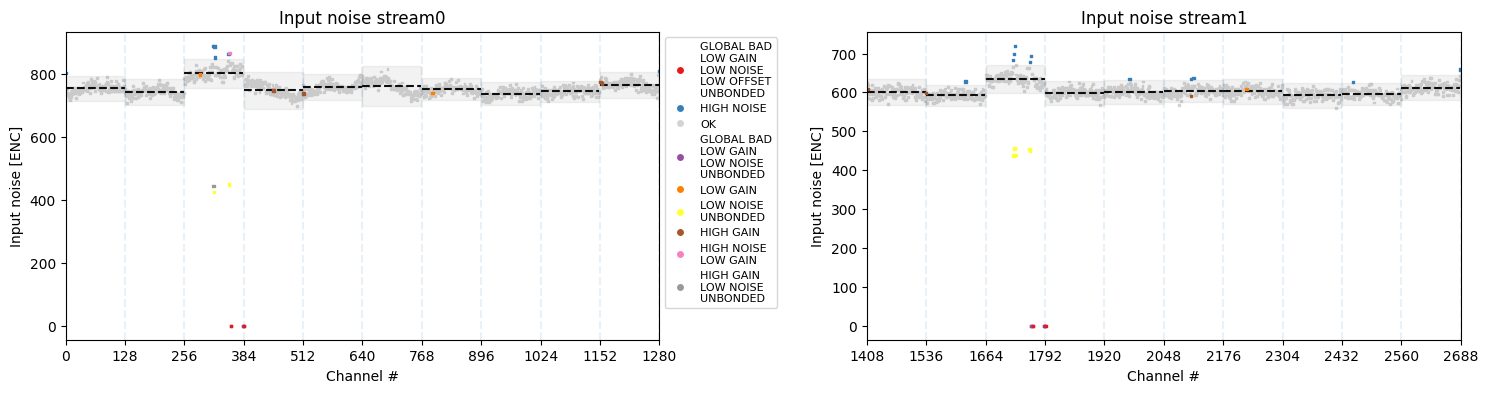

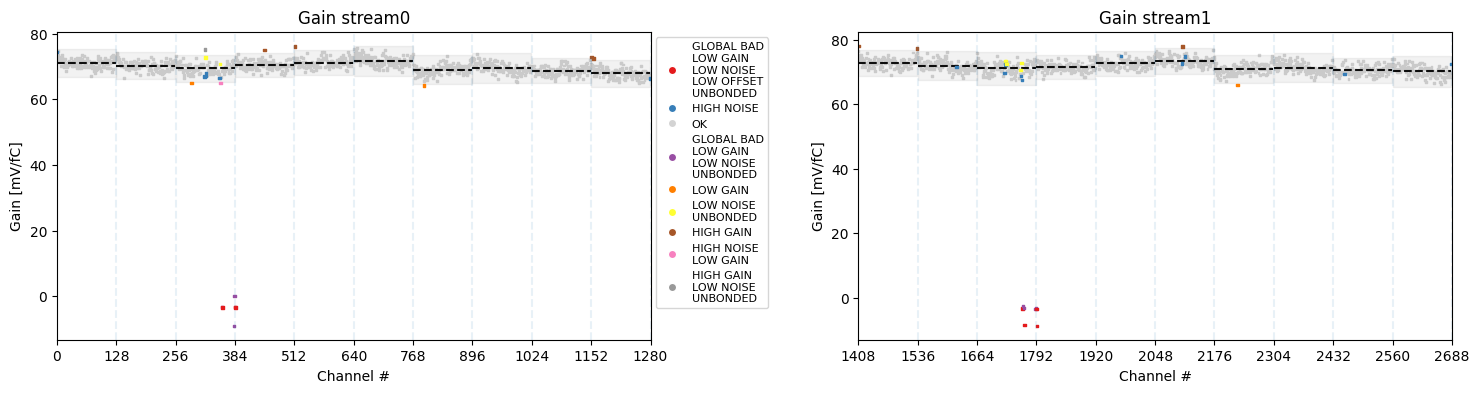

In [6]:
hybrid = parseRC(files[n])
hybrid.classification()
plotRCClassified(hybrid, "innse", showStats=True, zoomedIn=True);
plotRCClassified(hybrid, "gain", showStats=True, zoomedIn=True);
print("Showing file", n)
n += 1

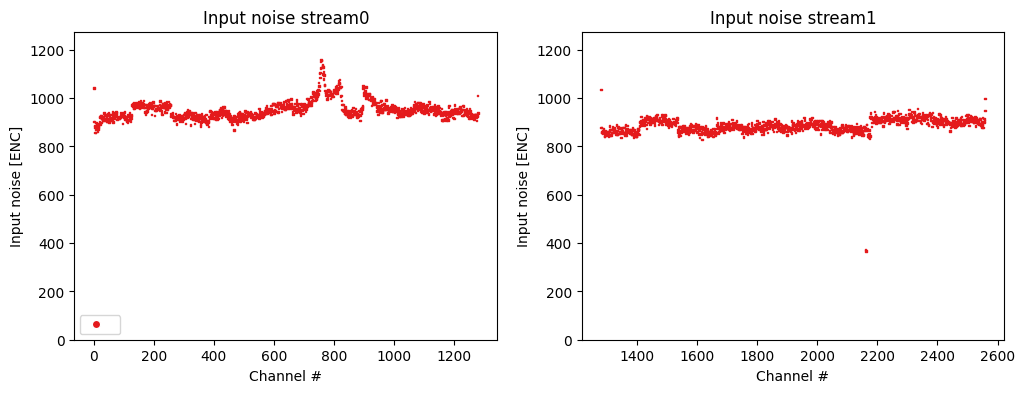

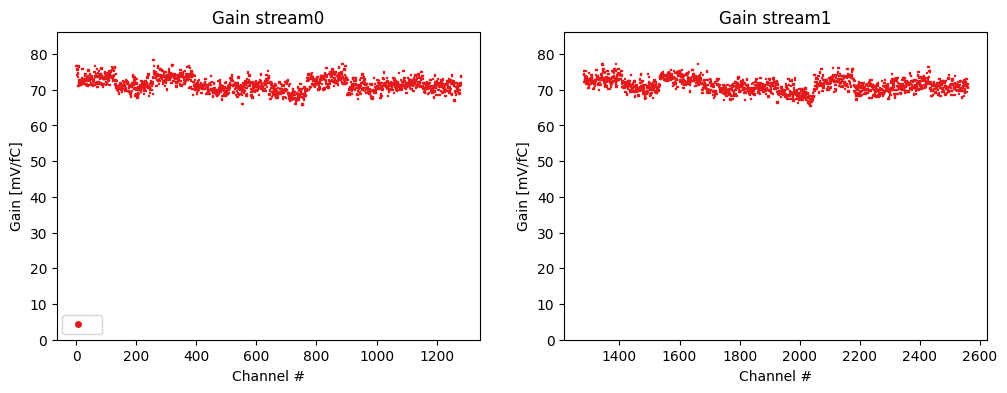

In [10]:
fig.axes

[<AxesSubplot: >]

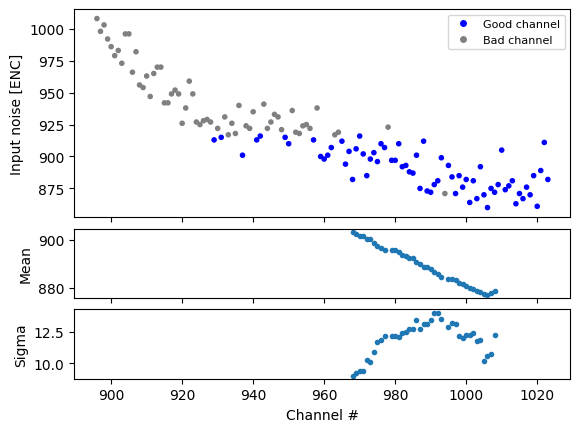

Stream 0 window sigma standard deviation: 1.321729359597943
11.328644501278792 -11.328644501278752
890.3478260869565


In [28]:
chip = hybrid.chips[7]
goodChannels = [channel for channel in chip.getStream(0) if not channel.badchannel]
nGoodChannels = len(goodChannels)
innses = [channel.innse for channel in goodChannels]
normInnses = [innse - np.mean(innses) for innse in innses]
sides = [normInnses[:nGoodChannels//2], normInnses[nGoodChannels//2:]]
plotRCAnomalies(chip, streams=0, windowSize=30)
print(np.sum(sides[0])/(nGoodChannels//2), np.sum(sides[1])/(nGoodChannels//2))
print(np.mean(innses))

In [10]:
n = 0

Looking at file number 0: ../data/sctvar-2022_04_05-13_59_27-20USBML1234660-SHF_PPA_LS02/results/star_barrel_LS_X_comID_15A-V1_RC_41_8.txt


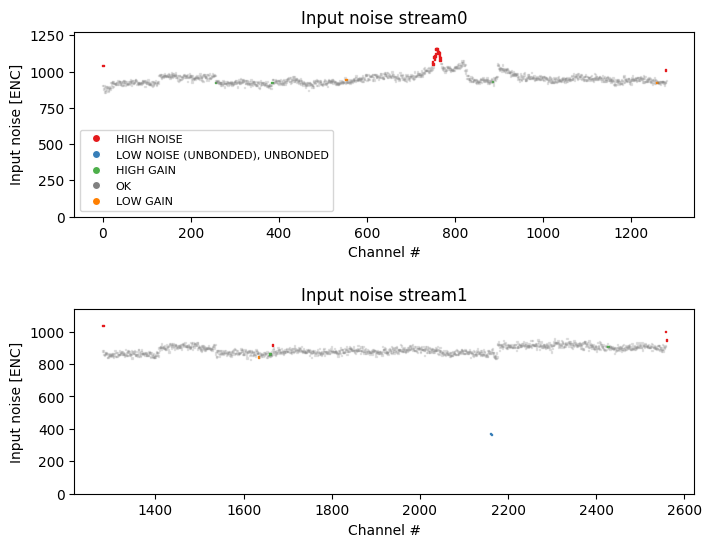

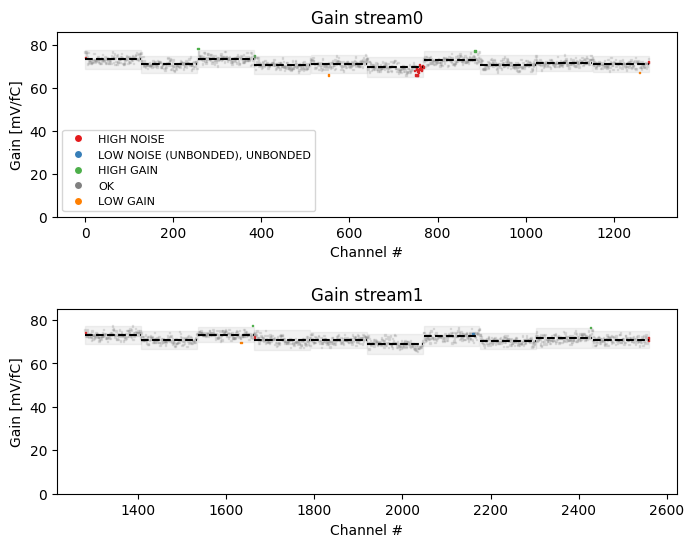

In [12]:
print("Looking at file number", str(n)+":", files[n])
hybrid = parseRC(files[n])
hybrid.classification(sigmaIterations=1)
#hybrid.classification()
plotRCClassified(hybrid, "innse", showStats=False);
plotRCClassified(hybrid, "gain", showStats=True);

In [59]:
print(hybrid.chips[7].allowedSigmas)
print(hybrid.chips[7].sigmaInnse(stream=0, countbadchannels=False))

{'gain': [3, 3], 'innse': [2.9, 3]}
16.144120917586008


In [ ]:
infoFile = "byEye/RCinfo.txt"

In [69]:
# For Doktoranddagen
import numpy as np
import matplotlib.pyplot as plt
def plotStreams(chip, streams=[1, 0], windowSize=16, countbadchannels=False):
    if not isinstance(streams, list):
        streams = [streams]
    fig, axs = plt.subplots(1,2, figsize=(12, 4))
    for s, stream in enumerate(streams):
        channels = chip.getStream(stream)
        innses = [channel.innse for channel in channels]
        #chanNums = [channel.channelnumber for channel in channels]
        axs[s].scatter([x for x in range(128)], innses, color='grey', marker='.')
        axs[s].set_ylabel("Input noise [ENC]")
        axs[s].set_xlabel("Channel number")
        axs[s].set_ylim(300, 1100)

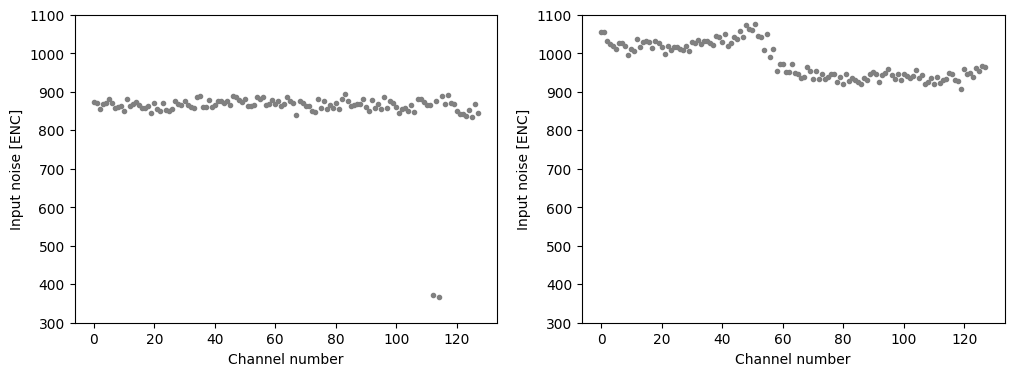

In [70]:
plotStreams(hybrid.chips[6])

# Luise files

In [1]:
import glob
from parsers.RCparsers import *
from plots.ResponseCurvePlots import *
import json
import matplotlib.pyplot as plt

In [2]:
files = glob.glob("../data/fromLuise/**/*RESPONSE*.json", recursive=True)

In [3]:
hybrids = []
jsonFiles = []
for file in files:
    with open(file, 'r') as f:
        jsonFile = json.load(f)
    if len(jsonFile['properties']['scan_info']['points']) == 10:
        jsonFiles.append(jsonFile)
        hybrid = parseRC(file)
        filenameSplit = file.split('_')
        for part in filenameSplit[:4]:
            if part[0] == 'R':
                hybrid.subtype = part
                print(hybrid.subtype)
        hybrids.append(hybrid)

Parsing file: ../data/fromLuise/20USEM1000001/20USEM10000013/DENNIS_PPB_ABCStar_R1H1_Hybrid0_20221209_2255_6_RESPONSE_CURVE_PPA.json
Addresses [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
R1H1
Parsing file: ../data/fromLuise/20USEM1000001/20USEM10000013/DENNIS_PPB_ABCStar_R1H0_Hybrid1_20221209_2255_6_RESPONSE_CURVE_PPA.json
Addresses [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
R1H0
Parsing file: ../data/fromLuise/20USEM1000001/20USEM10000012/DENNIS_PPB_ABCStar_R1H0_Hybrid1_20221209_2257_6_RESPONSE_CURVE_PPA.json
Addresses [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
R1H0
Parsing file: ../data/fromLuise/20USEM1000001/20USEM10000012/DENNIS_PPB_ABCStar_R1H1_Hybrid0_20221209_2257_6_RESPONSE_CURVE_PPA.json
Addresses [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
R1H1
Parsing file: ../data/fromLuise/20USEM1000001/20USEM10000011/PPB_ABCStar_R1H1_Hybrid0_20221121_2049_6_RESPONSE_CURVE_PPA.json
Addresses [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
R1H1
Parsing file: ../data/fromLuise/20USEM1000001/20USEM10000011/PPB_ABCStar_R1H0_Hybrid1_20221121_204

In [4]:
n = 0

/home/kaastran/Documents/aqt/itk-strip-module-analysis/plots/ResponseCurvePlots.py:340: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors_stream0 = np.array([channelColorDict[parseCommentsList(channel.comment)] for channel in hybrid.stream0])
/home/kaastran/Documents/aqt/itk-strip-module-analysis/plots/ResponseCurvePlots.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors_stream1 = np.array([channelColorDict[parseCommentsList(channel.comment)] for channel in hybrid.stream1])


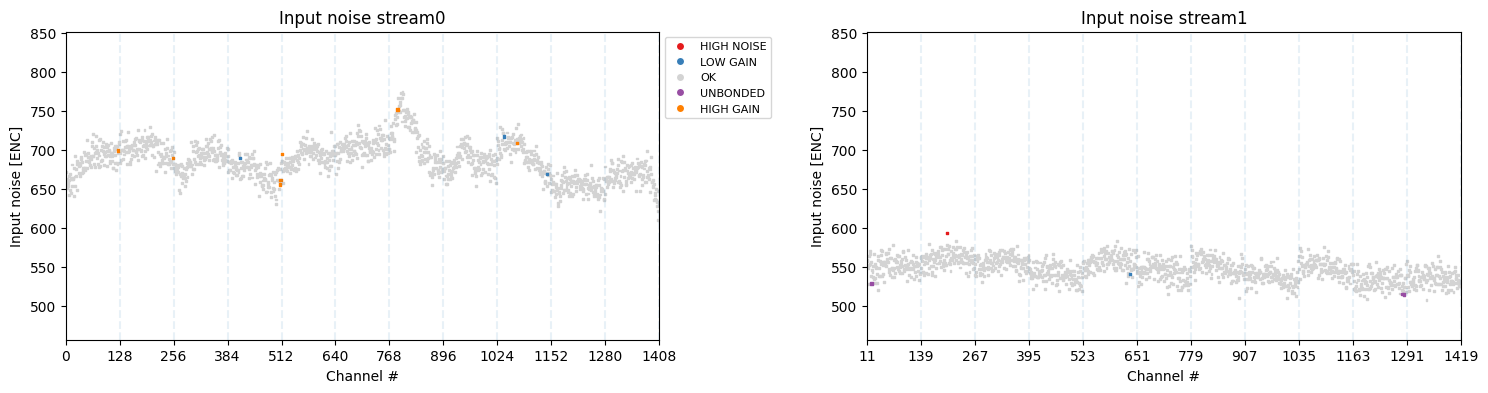

In [5]:
hybrids[n].classification()
plotRCClassified(hybrids[n], "innse")
n += 1

In [6]:
subtypes = ['R1H0', 'R1H1']
innses = {}
gains = {}
for subtype in subtypes:
    innses[subtype] = {'under': [], 'away' : []}
    gains[subtype] = {'under': [], 'away' : []}
for hybrid in hybrids:
    innses[hybrid.subtype]['under'].extend([channel.outnse for channel in hybrid.stream0])
    innses[hybrid.subtype]['away'].extend([channel.outnse for channel in hybrid.stream1])
    gains[hybrid.subtype]['under'].extend([channel.gain for channel in hybrid.stream0])
    gains[hybrid.subtype]['away'].extend([channel.gain for channel in hybrid.stream1])

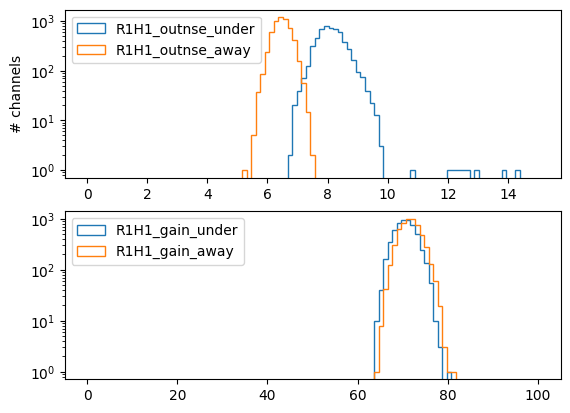

In [10]:
bins_innse = np.linspace(0, 15, 100)
bins_gain = np.linspace(0, 100, 100)
fig, axs = plt.subplots(2, 1)
for subtype in subtypes[1:]:
    for stream in ['under', 'away']:
        axs[0].hist(innses[subtype][stream], label=subtype+"_outnse_"+stream, bins=bins_innse, histtype='step')
        axs[1].hist(gains[subtype][stream], label=subtype+"_gain_"+stream, bins=bins_gain, histtype='step')
axs[0].legend(loc=2)
axs[0].set_yscale('log')
axs[0].set_ylabel('# channels')
axs[1].legend(loc=2)
axs[1].set_yscale('log')

In [ ]:
#

In [1]:
from parsers.RCparsers import parseRC
from plots.ResponseCurvePlots import *
inFile = "data/63c6126d3f47660036fc2fad.json"

In [2]:
hybrid = parseRC(inFile)

Parsing file: data/63c6126d3f47660036fc2fad.json
Addresses [None, None, 8, 7, 6, 5, 4, 3, 2, 1, 0]


ALL BAD STREAM 1
ALL BAD STREAM 1
ALL BAD STREAM 1
ALL BAD STREAM 1
ALL BAD STREAM 1
ALL BAD STREAM 1
ALL BAD STREAM 0
ALL BAD STREAM 1
ALL BAD STREAM 0
ALL BAD STREAM 1
ALL BAD STREAM 0
ALL BAD STREAM 1


/home/kaastran/Documents/aqt/itk-strip-module-analysis/plots/ResponseCurvePlots.py:337: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors_stream0 = np.array([channelColorDict[parseCommentsList(channel.comment)] for channel in hybrid.stream0])


(<Figure size 1800x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Input noise stream0'}, xlabel='Channel #', ylabel='Input noise [ENC]'>,
        <AxesSubplot: title={'center': 'Input noise stream1'}, xlabel='Channel #', ylabel='Input noise [ENC]'>],
       dtype=object))

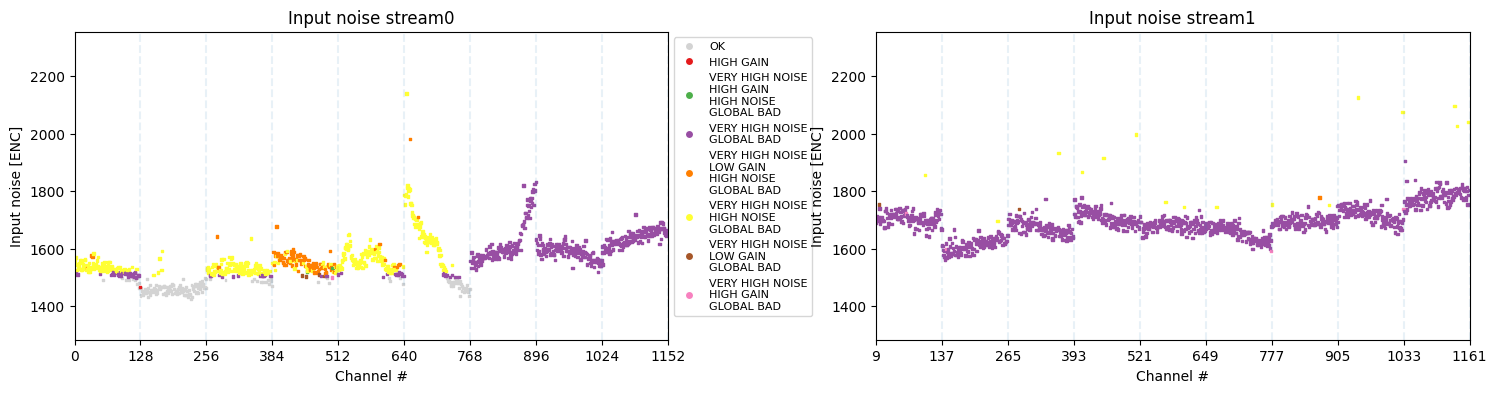

In [3]:
hybrid.classification()
plotRCClassified(hybrid, "innse")

In [6]:
sqrt(sum([1, -1]))

0.0

In [25]:
# Function to find the key path to given value in a dictionary
def findValue(dct, value):
    if isinstance(dct, dict):
        for key in dct:
            if isinstance(dct[key], str):
                if value in dct[key]:
                    return key
            elif value == dct[key]:
                return key
            found = findValue(dct[key], value)
            if found is not None:
                if isinstance(found, list):
                    found =  [key] + found
                else:
                    found = [key, found]
                return found
        return None
    
    elif isinstance(dct, list):
        for key, item in enumerate(dct):
            if isinstance (item, dict) or isinstance(item, list):
                found = findValue(item, value)
                if found is not None:
                    if isinstance(found, list):
                        found = [key] + found
                    else:
                        found = [key, found]
                    return found
            else:
                if isinstance(item, str):
                    if value in item:
                        return key
                elif value == item:
                    return key
        return None
    
    else:
        if isinstance(dct, str):
            if value in dct:
                return True
        elif value == dct:
            return True
        return None

In [26]:
def findKey(dct, targetKey, partial=True, verbose=True):
    values = []
    if isinstance(dct, dict):
        for key in dct.keys():
            if key == targetKey:
                values.append(dct[key])
                if verbose:
                    print(dct[key])
                    print()
            elif targetKey in key and partial:
                values.append(dct[key])
                if verbose:
                    print("Partial key match;", key, dct[key])
                    print()
            else:
                values.extend(findKey(dct[key], targetKey, partial=partial, verbose=verbose))
    if isinstance(dct, list):
        for item in dct:
            findKey(item, targetKey, partial=partial, verbose=verbose)
    return values

In [17]:
import itkdb
user = itkdb.core.User(accessCode1="", accessCode2="")
user.authenticate()
client = itkdb.Client(user=user)

In [5]:
component = client.get("getComponent", json={"component" : "20USEH20000037"})

In [16]:
findKey(component, "tests")

[{'id': '6034f0162d86a5000ada39e6', 'code': 'ASIC_GLUE_WEIGHT', 'name': 'Glue weight (ASICs on hybrid)', 'testRuns': [{'id': '6384e67f70e4de00287af413', 'state': 'ready', 'stateTs': '2022-11-28T16:49:03.451Z', 'stateUserIdentity': '6777-7595-1', 'runNumber': '1', 'passed': False, 'problems': False, 'date': '2022-11-17T12:00:00.000Z', 'institution': {'id': '5ac66e2609d7a800067a4cb4', 'code': 'UT', 'name': 'University of Toronto'}, 'cts': '2022-11-28T16:49:03.464Z'}]}, {'id': '603d379b8d8f97000b265249', 'code': 'VISUAL_INSPECTION_RECEPTION', 'name': 'Visual Inspection (Reception)', 'testRuns': [{'id': '6373bcc244dab4002833a4dc', 'state': 'ready', 'stateTs': '2022-11-15T16:22:26.341Z', 'stateUserIdentity': '6777-7595-1', 'runNumber': '1', 'passed': True, 'problems': False, 'date': '2022-10-26T12:00:00.000Z', 'institution': {'id': '5ac66e2609d7a800067a4cb4', 'code': 'UT', 'name': 'University of Toronto'}, 'cts': '2022-11-15T16:22:26.356Z'}]}, {'id': '60bcee913ef8d6000a0aa6e0', 'code': 'ASI

[[{'id': '6034f0162d86a5000ada39e6',
   'code': 'ASIC_GLUE_WEIGHT',
   'name': 'Glue weight (ASICs on hybrid)',
   'testRuns': [{'id': '6384e67f70e4de00287af413',
     'state': 'ready',
     'stateTs': '2022-11-28T16:49:03.451Z',
     'stateUserIdentity': '6777-7595-1',
     'runNumber': '1',
     'passed': False,
     'problems': False,
     'date': '2022-11-17T12:00:00.000Z',
     'institution': {'id': '5ac66e2609d7a800067a4cb4',
      'code': 'UT',
      'name': 'University of Toronto'},
     'cts': '2022-11-28T16:49:03.464Z'}]},
  {'id': '603d379b8d8f97000b265249',
   'code': 'VISUAL_INSPECTION_RECEPTION',
   'name': 'Visual Inspection (Reception)',
   'testRuns': [{'id': '6373bcc244dab4002833a4dc',
     'state': 'ready',
     'stateTs': '2022-11-15T16:22:26.341Z',
     'stateUserIdentity': '6777-7595-1',
     'runNumber': '1',
     'passed': True,
     'problems': False,
     'date': '2022-10-26T12:00:00.000Z',
     'institution': {'id': '5ac66e2609d7a800067a4cb4',
      'code': '

In [17]:
findValue(component, "RESPONSE")

['tests', 6, 'code']

In [18]:
component["tests"][6]

{'id': '6203775e987fb9000ab4f245',
 'code': 'RESPONSE_CURVE_PPA',
 'name': 'Response Curve PPA',
 'testRuns': [{'id': '63f6b07f4069b50036c34ab7',
   'state': 'ready',
   'stateTs': '2023-02-23T00:17:03.142Z',
   'stateUserIdentity': '22-1535-1',
   'runNumber': '2978-4',
   'passed': True,
   'problems': False,
   'date': '2023-02-23T00:10:21.000Z',
   'institution': {'id': '5a83234ddaf1a000052e3e9f',
    'code': 'TRIUMF',
    'name': 'TRIUMF'},
   'cts': '2023-02-23T00:17:03.412Z'},
  {'id': '63f6b2034069b50036c34b99',
   'state': 'ready',
   'stateTs': '2023-02-23T00:23:31.166Z',
   'stateUserIdentity': '22-1535-1',
   'runNumber': '2978-7',
   'passed': True,
   'problems': False,
   'date': '2023-02-23T00:23:11.000Z',
   'institution': {'id': '5a83234ddaf1a000052e3e9f',
    'code': 'TRIUMF',
    'name': 'TRIUMF'},
   'cts': '2023-02-23T00:23:31.282Z'},
  {'id': '6424755736225c0038b5154f',
   'state': 'ready',
   'stateTs': '2023-03-29T17:28:55.212Z',
   'stateUserIdentity': '7986-4

In [19]:
testRun = client.get("getTestRun", json={"testRun" : "6424755736225c0038b5154f"})

In [21]:
findKey(testRun, "testedAtStage")

{'code': 'ON_MODULE', 'name': 'On Module', 'order': 8, 'initial': False, 'final': True}



[]

# Looking at a module

In [1]:
from plots.ResponseCurvePlots import *
from parsers.RCparsers import parseRC

In [2]:
#filename = "data/6424756736225c0038b51577.json" #R1H0
filename = "data/642475de62f78200360c42e3.json" #R1H1
hybrid = parseRC(filename)

Parsing file: data/642475de62f78200360c42e3.json
Addresses [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


R1H1 2023-03-29T17:31:10.952Z


(<Figure size 1400x400 with 4 Axes>,
 array([<AxesSubplot: title={'center': 'Output noise under'}, xlabel='Channel #', ylabel='Output noise [mV]'>,
        <AxesSubplot: title={'center': 'Output noise away'}, xlabel='Channel #', ylabel='Output noise [mV]'>],
       dtype=object))

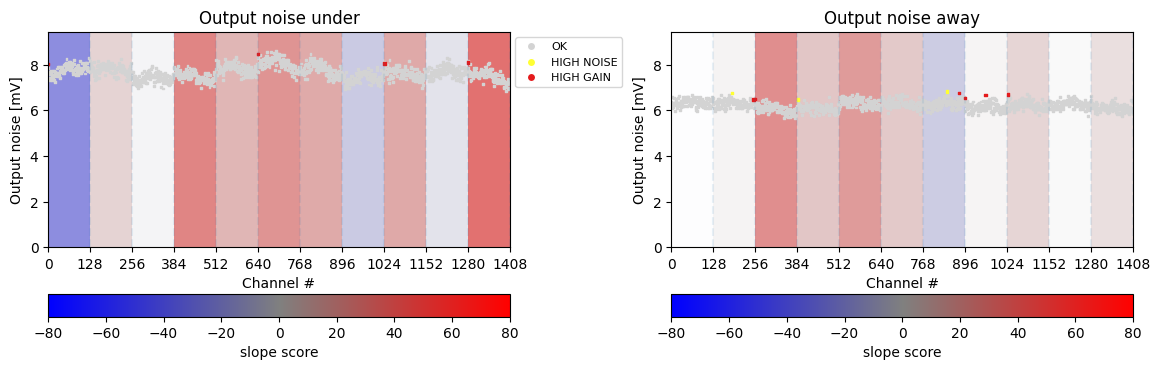

In [4]:
print(hybrid.subtype, hybrid.testDate)
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
hybrid.classification()
plotRCClassified(hybrid, "outnse", scoreChips=True, scoreType="slope", minValue=0, figure=(fig, axs))
#plotRCClassified(hybrid, "innse", maxValue=800)
#plotRCClassified(hybrid, "gain")

In [13]:
import sys


['/home/kaastran/Documents/aqt/itk-strip-module-analysis',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/kaastran/Documents/aqt/venv/itk-strip-module-analysis/lib/python3.8/site-packages',
 '../',
 '../']

In [18]:
for item in sys.path:
    thisDir = item.split("/")[-1]
    if thisDir == "itk-strip-module-analysis":
        rootPath = item
        break
print(rootPath)

/home/kaastran/Documents/aqt/itk-strip-module-analysis


In [4]:
a = max(max([1, 4]), max([2, 5]))

In [5]:
values = {0 : [1, 4], 1 : [2, 5]}

In [18]:
a = max([values[l] for l in values])

In [7]:
max([values[l] for l in values])

[2, 5]

In [6]:
import json
with open(filename, "r") as f:
    js = json.load(f)

In [9]:
for key in js:
    if key != "results":
        print(key, "=====")
        print(js[key])
        print()

id =====
642475de62f78200360c42e3

state =====
ready

stateTs =====
2023-03-29T17:31:10.952Z

stateUserIdentity =====
7986-4353-1

date =====
2023-03-29T01:15:54.000Z

testType =====
{'id': '6203775e987fb9000ab4f245', 'code': 'RESPONSE_CURVE_PPA', 'name': 'Response Curve PPA', 'state': 'active'}

institution =====
{'id': '5a83234ddaf1a000052e3e9f', 'code': 'TRIUMF', 'name': 'TRIUMF'}

user =====
{'id': '61d472673be1da000aa93b60', 'userIdentity': '7986-4353-1', 'firstName': 'Archa', 'middleName': '', 'lastName': 'Rajagopalan'}

runNumber =====
3340-6

passed =====
True

problems =====
False

properties =====
[{'code': 'DCS', 'name': 'DCS info', 'dataType': 'object', 'valueType': 'single', 'required': False, 'value': {'ABC_temp_raw_0': 2168, 'ABC_temp_raw_1': 2153, 'ABC_temp_raw_10': 2281, 'ABC_temp_raw_2': 2075, 'ABC_temp_raw_3': 2074, 'ABC_temp_raw_4': 2218, 'ABC_temp_raw_5': 2165, 'ABC_temp_raw_6': 2049, 'ABC_temp_raw_7': 2319, 'ABC_temp_raw_8': 2250, 'ABC_temp_raw_9': 2152, 'HCC_temp

In [12]:
import itkdb
user = itkdb.core.User(accessCode1="", accessCode2="")
user.authenticate()
client = itkdb.Client(user=user)

In [13]:
component = client.get("getComponent", json={"component" : "20USEH20000037"})

In [17]:
for key in component["children"]:
    print(key)
    print(component["children"][key])
    print()

{'id': '4ac1ee4f58d9f0fac49b14a5a0b350f9', 'order': 0, 'state': 'ready', 'timestamp': '2022-11-11T14:41:36.528Z', 'identity': '6777-7595-1', 'componentType': {'id': '59d6084fed67730005160cd4', 'code': 'HCC', 'name': 'HCC Chip', 'category': 'item'}, 'type': {'code': 'HCCSTAR', 'name': 'HCCSTAR'}, 'component': None, 'properties': [{'code': 'WAFER_NUMBER', 'value': None, 'name': 'Wafer Number', 'default': False, 'dataType': 'string', 'required': False}, {'code': 'POSITION_ON_WAFER', 'value': None, 'name': 'Position on Wafer', 'default': False, 'dataType': 'integer', 'required': False}, {'code': 'FUSE_ID', 'value': None, 'name': 'Fuse ID', 'default': False, 'dataType': 'string', 'required': False}]}


TypeError: list indices must be integers or slices, not dict

In [38]:
for child in component["children"]:
    print(child["componentType"])
    print()

{'id': '59d6084fed67730005160cd4', 'code': 'HCC', 'name': 'HCC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}

{'id': '59d5f213ed67730005160cd3', 'code': 'ABC', 'name': 'ABC Chip', 'category': 'item'}


In [39]:
component

{'id': '636e5f204f316a0028eb4721',
 'code': '62f76f2960ee1c713a4850415bb6483c',
 'serialNumber': '20USEH20000037',
 'alternativeIdentifier': 'UT-R1H0-0011',
 'project': {'code': 'S', 'name': 'Strips'},
 'subproject': {'code': 'SE', 'name': 'Strip endcaps'},
 'institution': {'id': '5ac66e2609d7a800067a4cb4',
  'code': 'UT',
  'name': 'University of Toronto',
  'latitude': 43.667713,
  'longitude': -79.396688},
 'currentLocation': {'id': '5a83234ddaf1a000052e3e9f',
  'code': 'TRIUMF',
  'name': 'TRIUMF',
  'latitude': 49.247372,
  'longitude': -123.229791},
 'currentLocationTs': '2023-02-22T04:45:06.110Z',
 'currentLocationUserIdentity': '22-1535-1',
 'shipmentDestination': None,
 'user': {'id': '633da0c3883f23000a1d3349',
  'userIdentity': '6777-7595-1',
  'firstName': 'Nikta',
  'middleName': '',
  'lastName': 'Zarif Yussefian'},
 'componentType': {'id': '600175bae4caf8000a50ce77',
  'code': 'HYBRID_ASSEMBLY',
  'name': 'STAR Hybrid Assembly',
  'snAutomatically': True,
  'category': '

In [41]:
componentTwo = client.get("getComponent", json={"component" : "20USEHN0000286"})

# Comparing good and bad modules, e.g., R0H0

In [57]:
import glob
import json
from analysis.Helpers.getHybridsFromIDFile import *
from parsers.RCparsers import parseRC
from plots.ResponseCurvePlots import plotRCClassified
import itkdb
import os
import numpy as np

In [5]:
import sys
sys.path.append("../")
from loadPDBCredentials import loadCredentials

In [6]:
currPath = os.getcwd()
os.chdir("../")
loadCredentials()
os.chdir(currPath)

Input password: ········
Credentials loaded into environment.



In [7]:
user = itkdb.core.User(accessCode1=os.environ["ITKDB_ACCESS_CODE1"], accessCode2=os.environ["ITKDB_ACCESS_CODE2"])
user.authenticate()
client = itkdb.Client(user=user)

In [83]:
subtype = "R0H0"
jsons = []
hybrids = []
files = glob.glob("data/*.json")
for file in files:
    with open(file, "r") as f:
        js = json.load(f)
        if js["components"][0]["type"]["code"] == subtype:
            if js["components"][0]["testedAtStage"]["code"] == "ON_MODULE":
                jsons.append(js)
                hybrids.append(parseRC(file, verbose=False))

In [88]:
tempHybrids = []
tempJsons = []
for hybrid, js in zip(hybrids, jsons):
    if "clone bug" not in hybrid.fileFormat:
        tempHybrids.append(hybrid)
        tempJsons.append(js)
hybrids = tempHybrids
jsons = tempJsons

In [132]:
modules = []
pwbs = []
pwb_vs = []
for js in jsons:
    sn = js["components"][0]["serialNumber"]
    hybrid_component = client.get("getComponent", json={"component" : sn})
    for parent in hybrid_component["parents"]:
        if parent["componentType"]["code"] == "MODULE":
            sn = parent["component"]["serialNumber"]
            module_component = client.get("getComponent", json={"component" : sn})
            modules.append(module_component)
            for child in module["children"]:
                if child["componentType"]["code"] == "PWB":
                    pwb_sn = child["component"]["serialNumber"]
                    pwb = client.get("getComponent", json={"component" : pwb_sn})
                    pwbs.append(pwb)
                    for prop in pwb["properties"]:
                        if prop["code"] == "VERSION":
                            vs = prop["value"]
                            pwb_vs.append(vs)

In [133]:
for module, js, hybrid, vs in zip(modules, jsons, hybrids, pwb_vs):
    print(module["serialNumber"], js["components"][0]["type"],
          np.mean([channel.innse for channel in hybrid.getStream(1)]),
          vs)

20USEM00000069 {'code': 'R0H0', 'name': 'R0H0 Assembly'} 592.0006433427334 3.1
20USEM00000045 {'code': 'R0H0', 'name': 'R0H0 Assembly'} 1083.3283650279045 3.1
20USEM00000047 {'code': 'R0H0', 'name': 'R0H0 Assembly'} 595.9094950556755 3.1
20USEM00000070 {'code': 'R0H0', 'name': 'R0H0 Assembly'} 604.8931831121445 3.1
20USEM00000070 {'code': 'R0H0', 'name': 'R0H0 Assembly'} 583.494962990284 3.1


In [138]:
for js, hybrid in zip(jsons, hybrids):
    mean = np.mean([channel.innse for channel in hybrid.getStream(1)])
    print(js["properties"][0]["value"])
    print(mean)
    print()

{'ABC_temp_raw_0': 2318, 'ABC_temp_raw_1': 2466, 'ABC_temp_raw_2': 2641, 'ABC_temp_raw_3': 2349, 'ABC_temp_raw_4': 2499, 'ABC_temp_raw_5': 2624, 'ABC_temp_raw_6': 2534, 'ABC_temp_raw_7': 2523, 'HCC_temp_raw': 417}
592.0006433427334

{'ABC_temp_raw_0': 2348, 'ABC_temp_raw_1': 2482, 'ABC_temp_raw_2': 2393, 'ABC_temp_raw_3': 2549, 'ABC_temp_raw_4': 2610, 'ABC_temp_raw_5': 2585, 'ABC_temp_raw_6': 2540, 'ABC_temp_raw_7': 2553, 'HCC_temp_raw': 391}
1083.3283650279045

{'ABC_temp_raw_10': 2341, 'ABC_temp_raw_3': 2384, 'ABC_temp_raw_4': 2420, 'ABC_temp_raw_5': 2386, 'ABC_temp_raw_6': 2269, 'ABC_temp_raw_7': 2222, 'ABC_temp_raw_8': 2209, 'ABC_temp_raw_9': 2284, 'HCC_temp_raw': 457}
595.9094950556755

{'ABC_temp_raw_0': 2511, 'ABC_temp_raw_1': 2544, 'ABC_temp_raw_2': 2429, 'ABC_temp_raw_3': 2522, 'ABC_temp_raw_4': 2496, 'ABC_temp_raw_5': 2428, 'ABC_temp_raw_6': 2453, 'ABC_temp_raw_7': 2426, 'HCC_temp_raw': 412, 'Module 0_current': 0, 'Module 0_voltage': 0}
604.8931831121445

{'ABC_temp_raw_0': 2

# Looking at temperatures

In [1]:
import glob
from parsers.RCparsers import parseRC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = glob.glob("data/*.json")
hybrids = {}
for file in files:
    hybrid = parseRC(file, verbose=False)
    if hybrid.subtype not in hybrids.keys():
        hybrids[hybrid.subtype] = []
    hybrids[hybrid.subtype].append(hybrid)

1534


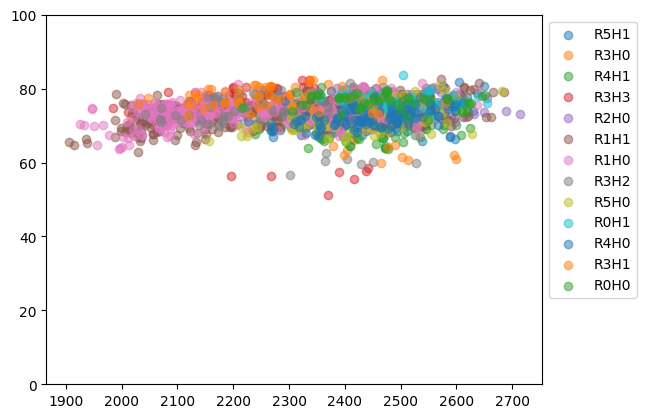

In [39]:
allTemps = []
n = 0
for subtype in list(hybrids.keys())[:]:
    temps = []
    meanOutnses = []
    for hybrid in hybrids[subtype]:
        if len(hybrid.chips) > 1:
            for c, chip in enumerate(hybrid.chips):
                temps.append(hybrid.ABCTemps[list(hybrid.ABCTemps.keys())[c]])
                meanOutnses.append(np.mean([channel.gain for channel in chip.getStream(1)]))
                n += 1
    plt.scatter(temps, meanOutnses, label=subtype, alpha=0.5)
    allTemps.extend(temps)
plt.legend(bbox_to_anchor=(1,1))
plt.ylim([0, 100])
print(n)

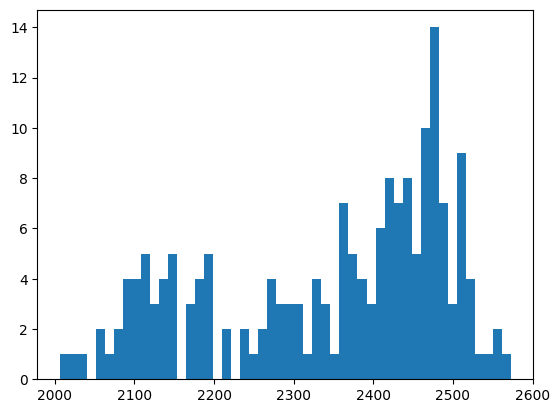

In [17]:
plt.hist(allTemps, bins=50);

In [11]:
hybrid.ABCTemps

{'0': 2431,
 '1': 2597,
 '2': 2388,
 '3': 2493,
 '4': 2460,
 '5': 2538,
 '6': 2588,
 '7': 2589,
 '8': 2482}

In [10]:
[chip.address for chip in hybrid.chips]

[10, 9, 8, 7, 6, 5, 4, 3, 2]